# 0. Default

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
# module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

In [4]:
order = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/handal/주문_상품별_상세검색_210927155232.xlsx')
cus = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/handal/고객_상세검색_210927155247.xls')
# handal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_csv.csv', encoding='utf-16')
# sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_sub_csv.csv', encoding='utf-16')
order.rename(columns = {'주문자 이메일': '이메일'}, inplace = True)
order.rename(columns = {'주문자 휴대폰 번호': '휴대폰 번호'}, inplace = True)

display(order)

,상품 이름,주문자 이름,휴대폰 번호,이메일,상품별 결제 금액,상품별 주문 상태,배송지 이름,배송지 휴대폰 번호,우편번호,배송지 주소,배송 시 요청 사항,주문 상태,주문 품목 개수,부분 취소 금액,부분 취소 후 잔액,상품 합계 금액,배송비,배송 메모,주문 일자,결제 방법,수량,메모,주문 제목,결제 금액,취소/반품 상품 수량,주문번호,상품 주문번호 (네이버페이),주문자 유형,주문자 아이디,택배회사,송장번호,개인통관고유부호,사용한 적립금,적립될 적립금,사용한 쿠폰,쿠폰 할인 금액,사용한 할인 코드,할인 코드 할인 금액,총 할인 금액,상품 부분 취소 전 상품 합계 금액,상품 부분 취소 전 배송비,상품 부분 취소 전 사용한 적립금,상품 부분 취소 전 적립될 적립금,상품 부분 취소 전 쿠폰 할인 금액,상품 부분 취소 전 할인 코드 할인 금액,상품 부분 취소 전 총 할인 금액,입금받을 계좌 정보,입금자,입금 기한,에스크로,TID,환불 계좌,취소/반품 사유,상품 코드,상품 옵션 정보,추가 옵션 정보,작성형 옵션 정보,주문 수량과 관계없이 고정된 추가 옵션 추가 금액
0,한달 브런치 공모전 도전하기 10/4(월)~10/24(일),채송아,010-3472-4876,110933@naver.com,89100,승인,채송아,010-3472-4876,-,NaN,-,결제 완료,1,-,-,89100,0,-,2021-09-27 12:08:26,카카오페이,1,-,한달 브런치 공모전 도전하기 10/4(월)~10/24(일),89100,0,20210927XVKGB,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2946604017788574499,-,-,-,-,-,-,-
1,[ 3일 독서 ] 기분이 태도가 되지 않게 10/12(화)~10/14(목),최효진,010-8359-4469,chj3412@kakao.com,0,승인,최효진,010-8359-4469,-,NaN,-,결제 완료,1,-,-,0,0,-,2021-09-27 11:09:32,-,1,-,[ 3일 독서 ] 기분이 태도가 되지 않게 10/12(화)~10/14(목),0,0,20210927YDK6V,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,한달 독서,김상헌,010-2066-0827,act882@kakao.com,59400,승인,김상헌,010-2066-0827,-,NaN,-,결제 완료,1,-,-,59400,0,-,2021-09-27 10:51:35,카카오페이,1,-,한달 독서,59400,0,202109275TQB7,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2946584209402034161,-,-,30dr0001,-,-,-,-
3,[ 3일 독서 ] 기분이 태도가 되지 않게 10/12(화)~10/14(목),김상헌,010-2066-0827,act882@kakao.com,0,승인,김상헌,010-2066-0827,-,NaN,-,결제 완료,1,-,-,0,0,-,2021-09-27 10:50:19,-,1,-,[ 3일 독서 ] 기분이 태도가 되지 않게 10/12(화)~10/14(목),0,0,20210927NALQA,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,"[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~10...",김상헌,010-2066-0827,act882@kakao.com,0,승인,김상헌,010-2066-0827,-,NaN,-,결제 완료,1,-,-,0,0,-,2021-09-27 10:49:33,-,1,-,"[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~10...",0,0,20210927HFBSH,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,한달서평,오미영,010-9278-5824,om55824@naver.com,50000,승인,오미영,010-9278-5824,21910,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",-,거래 완료,1,-,-,50000,0,NaN,2020-07-22 21:47:37,카카오페이,1,-,한달서평,50000,0,20200722UWJSL,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2786444476869893948,-,-,-,참여 기간: 한달 서평 (30일),-,-,-
3418,한달서평,김민희,010-7529-3324,qkfmsths10@naver.com,50000,전체 취소,김민희,010-7529-3324,06996,서울 동작구 동작대로33가길 17 (사당동) B/02호,-,취소 완료,1,-,-,50000,0,NaN,2020-07-22 20:59:32,무통장 입금,1,-,한달서평,50000,1,20200722IHGHN,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,기업은행(05807613204016) (주)한달어스,김민희,2020-07-23 23:59:59,-,-,-,-,-,참여 기간: 한달 서평 (30일),-,-,-
3419,한달서평,김준형,010-4841-2173,188cm.kim@gmail.com,50000,승인,김준형,010-4841-2173,04344,서울 용산구 회나무로 73 (이태원동) 서울시 용산구 회나무로73 3층,-,배송 완료,1,-,-,50000,0,NaN,2020-07-21 21:59:34,신용 / 체크카드,1,-,한달서평,50000,0,20200721GA2HC,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,StdpayCARDSIXhandal120200721220013635498,-,-,-,-,-,-,-
3420,한달서평,김준형,010-4841-2173,188cm.kim@gmail.com,50000,전체 취소,김준형,010-4841-2173,-,NaN,-,취소 완료,1,-,-,50000,0,NaN,2020-07-21 21:56:59,카카오페이,1,-,한달서평,50000,1,202007212NMHW,-,비회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2786075809762101163,-,-,-,-,-,-,-


In [5]:
order.columns

Index(['상품 이름', '주문자 이름', '휴대폰 번호', '이메일', '상품별 결제 금액', '상품별 주문 상태', '배송지 이름',
       '배송지 휴대폰 번호', '우편번호', '배송지 주소', '배송 시 요청 사항', '주문 상태', '주문 품목 개수',
       '부분 취소 금액', '부분 취소 후 잔액', '상품 합계 금액', '배송비', '배송 메모', '주문 일자', '결제 방법',
       '수량', '메모', '주문 제목', '결제 금액', '취소/반품 상품 수량', '주문번호', '상품 주문번호 (네이버페이)',
       '주문자 유형', '주문자 아이디', '택배회사', '송장번호', '개인통관고유부호', '사용한 적립금', '적립될 적립금',
       '사용한 쿠폰', '쿠폰 할인 금액', '사용한 할인 코드', '할인 코드 할인 금액', '총 할인 금액',
       '상품 부분 취소 전 상품 합계 금액', '상품 부분 취소 전 배송비', '상품 부분 취소 전 사용한 적립금',
       '상품 부분 취소 전 적립될 적립금', '상품 부분 취소 전 쿠폰 할인 금액', '상품 부분 취소 전 할인 코드 할인 금액',
       '상품 부분 취소 전 총 할인 금액', '입금받을 계좌 정보', '입금자', '입금 기한', '에스크로', 'TID',
       '환불 계좌', '취소/반품 사유', '상품 코드', '상품 옵션 정보', '추가 옵션 정보', '작성형 옵션 정보',
       '주문 수량과 관계없이 고정된 추가 옵션 추가 금액'],
      dtype='object')

In [6]:
display(cus)

,아이디,소셜 로그인,카카오 계정 연동,이메일,이름,등급,휴대폰 번호,우편번호,주소,생년월일,성별,추천인,구매 횟수,구매 금액,총 사용 적립금,사용 가능 적립금,가입일자,최근 로그인,최근 수정일,환불 계좌,메모,탈퇴 여부,마케팅 문자 수신 동의 여부,마케팅 문자 수신 동의 여부 변경 일자,마케팅 이메일 수신 동의 여부,마케팅 이메일 수신 동의 여부 변경 일자
0,-,kakao,사용,hiba486@naver.com,렬이,일반,010-8942-9008,-,-,1980-12-01,남자,-,0,-,0,0,2021-09-27 13:26:57,2021-09-27 13:26:57,2021-09-27 13:26:57,-,-,-,동의,-,동의,-
1,-,-,-,gooeykookie@gmail.com,고민지,일반,010-9877-2380,-,-,1996-03-28,여자,-,1,0,0,0,2021-09-27 09:39:59,2021-09-27 09:39:59,2021-09-27 09:40:25,-,-,-,거부,-,거부,-
2,-,-,-,abygh12@naver.com,유근혜,일반,010-2309-7883,-,-,1990-09-04,여자,-,0,-,0,0,2021-09-27 03:31:20,2021-09-27 03:31:20,2021-09-27 03:31:20,-,-,-,거부,-,거부,-
3,-,kakao,사용,ssjin9@nate.com,성수진,일반,010-4830-1463,-,-,1999-06-24,여자,-,0,-,0,0,2021-09-26 20:39:08,2021-09-26 20:39:08,2021-09-26 20:39:08,-,-,-,동의,-,동의,-
4,-,kakao,사용,tjdud_1217@naver.com,이서영,일반,010-4487-1217,-,-,1997-12-17,여자,-,2,0,0,0,2021-09-26 18:24:13,2021-09-26 19:42:32,2021-09-26 19:42:37,-,-,-,거부,-,거부,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,-,-,-,cherish1240@naver.com,김미경,일반,010-5175-1240,41514,"대구 북구 검단로 115 (검단동, 유성청구아파트) 105동 1217호",1987-10-26,여자,-,3,130000,5000,0,2020-07-22 22:39:00,2020-11-30 17:38:34,2020-10-18 23:27:35,-,-,-,거부,2020-07-22 22:39:00,거부,2020-07-22 22:39:00
1744,-,-,-,albilleo@naver.com,배동민,일반,010-5064-1833,16687,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,-,10,492750,5000,0,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,-,-,동의,2021-08-11 17:21:42,동의,2021-08-11 17:21:42
1745,-,-,-,om55824@naver.com,오미영,일반,010-9278-5824,21910,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",1981-12-24,여자,-,2,114300,5000,0,2020-07-22 21:42:43,2021-03-01 14:56:02,2021-01-16 18:57:57,-,-,-,동의,2020-07-22 21:42:43,동의,2020-07-22 21:42:43
1746,-,-,-,qkfmsths10@naver.com,김민희,일반,010-7529-3324,06996,서울 동작구 동작대로33가길 17 (사당동) B/02호,1960-05-25,여자,-,6,282650,0,5000,2020-07-22 20:59:15,2021-09-17 09:34:40,2021-09-17 09:36:48,-,-,-,동의,2021-08-25 09:49:34,동의,2021-08-25 09:49:34


In [7]:
data = pd.merge(order, cus, how = "left", on = ["이메일", "휴대폰 번호"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 0 to 3421
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   상품 이름                        3422 non-null   object 
 1   주문자 이름                       3422 non-null   object 
 2   휴대폰 번호                       3422 non-null   object 
 3   이메일                          3422 non-null   object 
 4   상품별 결제 금액                    3422 non-null   int64  
 5   상품별 주문 상태                    3422 non-null   object 
 6   배송지 이름                       3422 non-null   object 
 7   배송지 휴대폰 번호                   3422 non-null   object 
 8   우편번호_x                       3422 non-null   object 
 9   배송지 주소                       834 non-null    object 
 10  배송 시 요청 사항                   3422 non-null   object 
 11  주문 상태                        3422 non-null   object 
 12  주문 품목 개수                     3422 non-null   int64  
 13  부분 취소 금액          

In [9]:
data[['상품 이름', '주문자 이름', '휴대폰 번호', '이메일', '상품별 결제 금액', '상품별 주문 상태', '주문 일자', '총 할인 금액', '구매 횟수', '구매 금액', '성별', '생년월일', '가입일자', '소셜 로그인', '취소/반품 사유', '주문 상태', '주문 품목 개수']]['주문 품목 개수'].value_counts()

1    3205
2     159
3      36
5      11
4      11
Name: 주문 품목 개수, dtype: int64

In [10]:
data[['상품 이름', '주문자 이름', '휴대폰 번호', '이메일', '배송지 주소', '상품별 결제 금액', '상품별 주문 상태', '주문 일자', '총 할인 금액', '구매 횟수', '구매 금액', '성별', '생년월일', '가입일자', '소셜 로그인', '취소/반품 사유', '주문 상태', '주문 품목 개수']][data['주문자 이름'] == '최효진']

,상품 이름,주문자 이름,휴대폰 번호,이메일,배송지 주소,상품별 결제 금액,상품별 주문 상태,주문 일자,총 할인 금액,구매 횟수,구매 금액,성별,생년월일,가입일자,소셜 로그인,취소/반품 사유,주문 상태,주문 품목 개수
1,[ 3일 독서 ] 기분이 태도가 되지 않게 10/12(화)~10/14(목),최효진,010-8359-4469,chj3412@kakao.com,NaN,0,승인,2021-09-27 11:09:32,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,결제 완료,1
44,한달 독서,최효진,010-8359-4469,chj3412@kakao.com,NaN,59400,승인,2021-09-24 14:05:03,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,결제 완료,1
573,[ 3일 독서 ] 태지원 | 그림으로 나를 위로하는 밤 8/19(목)~8/21(토),최효진,010-8359-4469,chj3412@kakao.com,NaN,0,승인,2021-08-02 11:36:56,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,1
574,[ 3일 독서 ] 김현성 | 선거로 읽는 한국 정치사 8/11(수)~8/13(금),최효진,010-8359-4469,chj3412@kakao.com,NaN,0,승인,2021-08-02 11:36:33,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,1
639,한달 독서,최효진,010-8359-4469,chj3412@kakao.com,NaN,59400,승인,2021-07-30 16:17:56,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,한달달리기만 취소하고 싶어요.,결제 완료,2
640,한달 러닝,최효진,010-8359-4469,chj3412@kakao.com,NaN,59400,상품 부분 취소,2021-07-30 16:17:56,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,한달달리기만 취소하고 싶어요.,결제 완료,2
886,[ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일),최효진,010-8359-4469,chj3412@kakao.com,NaN,0,승인,2021-06-21 17:25:44,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,1
997,한달 달리기,최효진,010-8359-4469,chj3412@kakao.com,NaN,59400,승인,2021-06-11 19:41:40,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,2
998,한달 블로그 매일 쓰기,최효진,010-8359-4469,chj3412@kakao.com,NaN,59400,상품 부분 취소,2021-06-11 19:41:40,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,2
1071,한달어스 14기 금메달리스트 실물 굿즈 신청 (마감:6월13일 자정),최효진,010-8359-4469,chj3412@kakao.com,"경기 용인시 처인구 금어로 91 (고림동, 그랜드맨션) 1동305호",0,승인,2021-06-11 11:52:05,0,21.0,591500,여자,1980-06-03,2021-01-14 08:07:33,kakao,-,거래 완료,1


# 탐색

In [11]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   아이디                     1748 non-null   object
 1   소셜 로그인                  1748 non-null   object
 2   카카오 계정 연동               1748 non-null   object
 3   이메일                     1748 non-null   object
 4   이름                      1748 non-null   object
 5   등급                      1748 non-null   object
 6   휴대폰 번호                  1748 non-null   object
 7   우편번호                    1748 non-null   object
 8   주소                      1748 non-null   object
 9   생년월일                    1748 non-null   object
 10  성별                      1748 non-null   object
 11  추천인                     1748 non-null   object
 12  구매 횟수                   1748 non-null   int64 
 13  구매 금액                   1748 non-null   object
 14  총 사용 적립금                1748 non-null   int64 
 15  사용 가

In [12]:
cus_df = cus[['소셜 로그인', '카카오 계정 연동', '이메일', '이름', '휴대폰 번호', '주소', '생년월일', '성별', '구매 횟수', '구매 금액', '가입일자', '최근 로그인', '최근 수정일', '메모', '마케팅 문자 수신 동의 여부', '마케팅 이메일 수신 동의 여부']]

In [13]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   소셜 로그인            1748 non-null   object
 1   카카오 계정 연동         1748 non-null   object
 2   이메일               1748 non-null   object
 3   이름                1748 non-null   object
 4   휴대폰 번호            1748 non-null   object
 5   주소                1748 non-null   object
 6   생년월일              1748 non-null   object
 7   성별                1748 non-null   object
 8   구매 횟수             1748 non-null   int64 
 9   구매 금액             1748 non-null   object
 10  가입일자              1748 non-null   object
 11  최근 로그인            1748 non-null   object
 12  최근 수정일            1748 non-null   object
 13  메모                1748 non-null   object
 14  마케팅 문자 수신 동의 여부   1748 non-null   object
 15  마케팅 이메일 수신 동의 여부  1748 non-null   object
dtypes: int64(1), object(15)
memory usage: 218.6+ KB


In [14]:
cus_df

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부
0,kakao,사용,hiba486@naver.com,렬이,010-8942-9008,-,1980-12-01,남자,0,-,2021-09-27 13:26:57,2021-09-27 13:26:57,2021-09-27 13:26:57,-,동의,동의
1,-,-,gooeykookie@gmail.com,고민지,010-9877-2380,-,1996-03-28,여자,1,0,2021-09-27 09:39:59,2021-09-27 09:39:59,2021-09-27 09:40:25,-,거부,거부
2,-,-,abygh12@naver.com,유근혜,010-2309-7883,-,1990-09-04,여자,0,-,2021-09-27 03:31:20,2021-09-27 03:31:20,2021-09-27 03:31:20,-,거부,거부
3,kakao,사용,ssjin9@nate.com,성수진,010-4830-1463,-,1999-06-24,여자,0,-,2021-09-26 20:39:08,2021-09-26 20:39:08,2021-09-26 20:39:08,-,동의,동의
4,kakao,사용,tjdud_1217@naver.com,이서영,010-4487-1217,-,1997-12-17,여자,2,0,2021-09-26 18:24:13,2021-09-26 19:42:32,2021-09-26 19:42:37,-,거부,거부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,-,-,cherish1240@naver.com,김미경,010-5175-1240,"대구 북구 검단로 115 (검단동, 유성청구아파트) 105동 1217호",1987-10-26,여자,3,130000,2020-07-22 22:39:00,2020-11-30 17:38:34,2020-10-18 23:27:35,-,거부,거부
1744,-,-,albilleo@naver.com,배동민,010-5064-1833,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,10,492750,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,동의,동의
1745,-,-,om55824@naver.com,오미영,010-9278-5824,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",1981-12-24,여자,2,114300,2020-07-22 21:42:43,2021-03-01 14:56:02,2021-01-16 18:57:57,-,동의,동의
1746,-,-,qkfmsths10@naver.com,김민희,010-7529-3324,서울 동작구 동작대로33가길 17 (사당동) B/02호,1960-05-25,여자,6,282650,2020-07-22 20:59:15,2021-09-17 09:34:40,2021-09-17 09:36:48,-,동의,동의


## 성별에 따른 무언가

In [15]:
# 여성의 비율이 굉장히 높다
cus_df[['성별']].value_counts()

성별
여자    1366
남자     381
-        1
dtype: int64

In [16]:
# 관리자 제거
cus_df = cus_df[ : 1747]

In [17]:
# 구매 금액이 '-' 인 부분을 모두 0으로 바꿔줌
cus_df.loc[cus_df['구매 금액'] == '-', '구매 금액'] = 0

In [18]:
# 구매 금액의 평균은 굉장히 비슷한 편
cus_df[['구매 금액']] = cus_df[['구매 금액']].astype('int')
cus_df.groupby(['성별'])[['구매 금액']].mean()

,구매 금액
성별,
남자,62187.742782
여자,62391.508053


In [19]:
# 제일 많이 구매한 고객도 비슷
cus_df.groupby(['성별'])[['구매 금액']].max()

,구매 금액
성별,
남자,964750
여자,956450


In [20]:
cus_df.groupby(['성별'])[['구매 횟수']].mean()

,구매 횟수
성별,
남자,1.593176
여자,1.629575


In [21]:
cus_df.groupby(['성별'])[['구매 횟수']].max()

,구매 횟수
성별,
남자,17
여자,34


In [22]:
cus_df[['주소']].value_counts()

주소                                            
-                                                 1496
경남 진주시 향교로120번길 16 (옥봉동) 3층                          2
경북 구미시 선산읍 단계동길 96 (완전리) 단계동길96                      1
대구 동구 과학로17길 12-1 (각산동, 해비치) 1층                      1
대구 달서구 이곡공원로 83 (용산동, 성서2차영남우방타운) 107동402호           1
                                                  ... 
서울 노원구 섬밭로 229 (하계동, 극동,건영,벽산아파트) 9동 1409호           1
서울 노원구 상계동 1255 은빛1차아파트 104동 304호                    1
서울 노원구 동일로215길 48 (상계동, 상계주공3단지아파트) 323동 1105호       1
서울 금천구 디지털로 207 (가산동, G밸리 페트라 힐스) 1601호              1
서울 강남구 밤고개로27길 9-22 (율현동) 201호                       1
Length: 251, dtype: int64

In [23]:
# 휴대폰 번호가 중복인 경우가 58건. 총 58명이 계정을 2개 사용중
[cus_df[['휴대폰 번호']].value_counts() == 2][0].sum()

58

In [24]:
cus_df[cus_df['휴대폰 번호'] == [cus_df[['휴대폰 번호']].value_counts() == 2][0][: 58].index[0][0]]

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부
943,kakao,사용,originalhj@kakao.com,김현주,010-4723-2604,-,1976-01-26,여자,4,195150,2021-03-01 23:09:45,2021-05-07 19:36:42,2021-05-07 19:36:50,-,동의,동의
1307,-,-,everbeauty@naver.com,김현주,010-4723-2604,-,1976-01-26,여자,1,66300,2021-01-05 10:43:58,2021-03-10 10:01:15,2021-01-05 10:44:34,-,동의,동의


In [25]:
# 중복된 전화번호 리스트
pn_list = [cus_df[['휴대폰 번호']].value_counts() == 2][0][: 58].index
pn_list[0][0]

'010-4723-2604'

In [26]:
idx = []
for i in range(len(pn_list)) :
  idx.append(cus_df[cus_df['휴대폰 번호'] == pn_list[i][0]].index.values[0])
  idx.append(cus_df[cus_df['휴대폰 번호'] == pn_list[i][0]].index.values[1])

In [27]:
cus_df.loc[idx]

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부
943,kakao,사용,originalhj@kakao.com,김현주,010-4723-2604,-,1976-01-26,여자,4,195150,2021-03-01 23:09:45,2021-05-07 19:36:42,2021-05-07 19:36:50,-,동의,동의
1307,-,-,everbeauty@naver.com,김현주,010-4723-2604,-,1976-01-26,여자,1,66300,2021-01-05 10:43:58,2021-03-10 10:01:15,2021-01-05 10:44:34,-,동의,동의
1642,-,-,eunha881125@gmail.com,강은하,010-3213-3825,서울 중랑구 면목로42길 35 (면목동) 반지하 앞,1988-11-25,여자,12,578700,2020-09-09 13:34:11,2021-08-23 22:26:12,2021-08-23 22:26:12,-,동의,동의
1645,kakao,사용,blackcosmos1@hanmail.net,강은하,010-3213-3825,-,1988-11-25,여자,4,0,2020-09-09 09:53:27,2021-09-19 10:26:49,2021-09-18 06:01:25,-,동의,동의
116,kakao,사용,qkrtjfd92@naver.com,박설아,010-7149-8021,-,1992-08-28,여자,0,0,2021-08-18 00:26:25,2021-08-20 18:26:14,2021-08-20 18:26:14,-,동의,동의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,-,-,qkrgpqhd@naver.com,박혜봉,010-5069-3608,-,1992-05-07,여자,0,0,2021-01-20 10:53:59,2021-06-24 22:04:05,2021-01-20 10:53:59,-,동의,동의
1398,kakao,사용,gptjs8014@naver.com,박혜선,010-5580-7440,-,1988-08-14,여자,2,101500,2020-12-27 08:08:07,2021-06-06 16:58:44,2021-02-13 00:26:34,-,동의,동의
1399,-,-,judolove0814@hanmail.net,박혜선,010-5580-7440,-,1988-08-14,여자,2,11000,2020-12-27 08:07:18,2021-06-24 20:43:29,2021-03-02 23:47:47,-,동의,동의
581,-,-,jiwon803@gmail.com,김지원,010-3834-6887,-,1998-02-28,남자,4,165200,2021-06-10 19:52:06,2021-09-26 20:08:11,2021-09-26 16:16:56,-,동의,동의


## 나이, 연령층 추가

In [28]:
cus_df['생년'] = [i[:4] for i in cus_df['생년월일']]

In [29]:
cus_df[cus_df['생년'] == '-']

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년
364,-,-,chru5954@naver.com,정현일,010-3265-9541,-,-,남자,0,0,2021-07-05 11:11:34,2021-08-09 18:58:48,2021-08-09 18:58:48,-,동의,동의,-
1454,kakao,사용,jeongmee@kakao.com,심정미,010-2561-6018,-,-,여자,9,333500,2020-12-14 17:38:45,2021-08-17 10:23:07,2021-08-17 10:23:07,-,동의,동의,-
1670,kakao,사용,jeinesines@gmail.com,차지은,010-8756-8846,"서울 관악구 남부순환로 1802 (봉천동, 관악캠퍼스타워)",-,여자,10,412500,2020-09-01 15:54:31,2021-09-03 10:41:50,2021-08-17 15:30:13,-,동의,동의,-


In [30]:
cus_df['생년'].value_counts()

1992    120
1994    111
1993    108
1990     93
1991     93
1995     86
1988     80
1987     74
1989     73
1985     73
1986     67
1996     67
1984     56
1983     51
1998     43
1981     43
1982     42
1979     42
1997     41
1980     40
1999     36
1977     33
1978     25
1971     24
1974     21
1976     21
2000     20
2001     19
1975     19
1973     16
1972     16
1970     14
1967     11
1965      9
1968      9
1969      7
1966      6
2002      6
2005      4
2004      4
2003      4
-         3
1963      2
1961      2
1960      2
2006      2
2008      1
1957      1
2007      1
94-0      1
1955      1
7912      1
1962      1
2020      1
02-0      1
Name: 생년, dtype: int64

In [31]:
# 생년월일이 잘못 기재된 데이터들 바꿔줌
cus_df['생년'].loc[cus_df['생년'] == '02-0'] = '2002'
cus_df['생년'].loc[cus_df['생년'] == '94-0'] = '1994'
cus_df['생년'].loc[cus_df['생년'] == '7912'] = '1979'

# 생년월일이 없는 데이터들 삭제
cus_df = cus_df.drop(cus_df[cus_df['생년'] == '-'].index, axis = 0).reset_index(drop = True)

In [32]:
cus_df

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년
0,kakao,사용,hiba486@naver.com,렬이,010-8942-9008,-,1980-12-01,남자,0,0,2021-09-27 13:26:57,2021-09-27 13:26:57,2021-09-27 13:26:57,-,동의,동의,1980
1,-,-,gooeykookie@gmail.com,고민지,010-9877-2380,-,1996-03-28,여자,1,0,2021-09-27 09:39:59,2021-09-27 09:39:59,2021-09-27 09:40:25,-,거부,거부,1996
2,-,-,abygh12@naver.com,유근혜,010-2309-7883,-,1990-09-04,여자,0,0,2021-09-27 03:31:20,2021-09-27 03:31:20,2021-09-27 03:31:20,-,거부,거부,1990
3,kakao,사용,ssjin9@nate.com,성수진,010-4830-1463,-,1999-06-24,여자,0,0,2021-09-26 20:39:08,2021-09-26 20:39:08,2021-09-26 20:39:08,-,동의,동의,1999
4,kakao,사용,tjdud_1217@naver.com,이서영,010-4487-1217,-,1997-12-17,여자,2,0,2021-09-26 18:24:13,2021-09-26 19:42:32,2021-09-26 19:42:37,-,거부,거부,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,-,-,lleunjoo@gmail.com,이은주,010-5297-3171,"서울 중랑구 신내역로 165 (신내동, 신내 데시앙포레) 215-1402",1980-10-13,여자,12,364500,2020-07-22 22:58:07,2021-04-28 10:31:08,2021-03-24 11:03:31,-,거부,거부,1980
1740,-,-,cherish1240@naver.com,김미경,010-5175-1240,"대구 북구 검단로 115 (검단동, 유성청구아파트) 105동 1217호",1987-10-26,여자,3,130000,2020-07-22 22:39:00,2020-11-30 17:38:34,2020-10-18 23:27:35,-,거부,거부,1987
1741,-,-,albilleo@naver.com,배동민,010-5064-1833,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,10,492750,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,동의,동의,1986
1742,-,-,om55824@naver.com,오미영,010-9278-5824,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",1981-12-24,여자,2,114300,2020-07-22 21:42:43,2021-03-01 14:56:02,2021-01-16 18:57:57,-,동의,동의,1981


In [33]:
cus_df['나이'] = [2021 - int(i) + 1 for i in cus_df['생년']]

In [34]:
cus_df['나이'].loc[0]

42

In [35]:
cus_df['연령대'] = cus_df['나이']
for i in range(len(cus_df)) :
  if cus_df['나이'].loc[i] >= 60 :
    cus_df['연령대'].loc[i] = '60대 이상'
  elif cus_df['나이'].loc[i] >= 55 :
    cus_df['연령대'].loc[i] = '50대 후반'
  elif cus_df['나이'].loc[i] >= 50 :
    cus_df['연령대'].loc[i] = '50대 초반'
  elif cus_df['나이'].loc[i] >= 45 :
    cus_df['연령대'].loc[i] = '40대 후반'
  elif cus_df['나이'].loc[i] >= 40 :
    cus_df['연령대'].loc[i] = '40대 초반'
  elif cus_df['나이'].loc[i] >= 35 :
    cus_df['연령대'].loc[i] = '30대 후반'
  elif cus_df['나이'].loc[i] >= 30 :
    cus_df['연령대'].loc[i] = '30대 초반'
  elif cus_df['나이'].loc[i] >= 25 :
    cus_df['연령대'].loc[i] = '20대 후반'
  elif cus_df['나이'].loc[i] >= 20 :
    cus_df['연령대'].loc[i] = '20대 초반'
  elif cus_df['나이'].loc[i] >= 10 :
    cus_df['연령대'].loc[i] = '10대'
  else :
    cus_df['연령대'].loc[i] = '10대 미만'

In [36]:
# 30대 초반과 20대 후반이 가장 많다.
cus_df['연령대'].value_counts()

30대 초반    459
20대 후반    414
30대 후반    321
40대 초반    193
20대 초반    125
40대 후반    110
50대 초반     70
50대 후반     28
10대        16
60대 이상      7
10대 미만      1
Name: 연령대, dtype: int64

In [37]:
cus_df.groupby(['성별'])['나이'].value_counts()

성별  나이
남자  30    37
    31    30
    28    28
    36    20
    34    19
          ..
여자  2      1
    14     1
    15     1
    59     1
    60     1
Name: 나이, Length: 90, dtype: int64

In [38]:
cus_df['성별'].value_counts()

여자    1364
남자     380
Name: 성별, dtype: int64

In [39]:
cus_df[cus_df['생년'] == '2020']

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년,나이,연령대
1697,kakao,사용,delicated@kakao.com,김빛나,010-5242-5341,"서울 서초구 잠원로 213-10 (잠원동, 한강아파트) .",2020-08-15,여자,5,95000,2020-07-27 20:04:34,2021-09-08 20:35:47,2021-08-13 23:49:21,-,동의,동의,2020,2,10대 미만


In [40]:
cus_df['소셜 로그인'].value_counts()

kakao    1142
-         602
Name: 소셜 로그인, dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


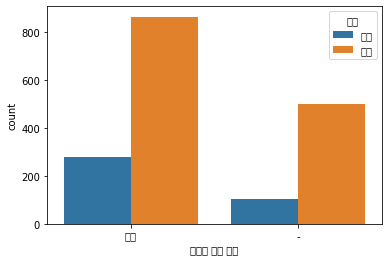

In [41]:
sns.countplot(x = '카카오 계정 연동', data = cus_df, hue = '성별')
plt.show()

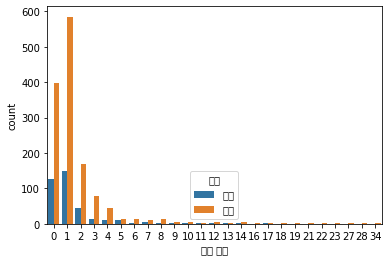

In [42]:
sns.countplot(x = '구매 횟수', data = cus_df, hue = '성별')
plt.show()

## 연령대 별 실 구매 비율
- 실 구매 비율은 구매 횟수가 1 이상인 경우의 비율을 구함

In [43]:
# 연령대별 구매 횟수를 구한다
age_count = cus_df.groupby('연령대')['구매 횟수'].count()
age_count

연령대
10대        16
10대 미만      1
20대 초반    125
20대 후반    414
30대 초반    459
30대 후반    321
40대 초반    193
40대 후반    110
50대 초반     70
50대 후반     28
60대 이상      7
Name: 구매 횟수, dtype: int64

In [44]:
# 연령대별로 구매 횟수가 0인 것들을 가져온다.
age_0_count = cus_df[cus_df['구매 횟수'] == 0].groupby('연령대')['구매 횟수'].count()
age_0_count

연령대
10대         5
20대 초반     49
20대 후반    126
30대 초반    117
30대 후반     85
40대 초반     61
40대 후반     43
50대 초반     24
50대 후반     10
60대 이상      4
Name: 구매 횟수, dtype: int64

In [45]:
# 구매율을 구한다.
buy_rate = (1 - age_0_count / age_count) * 100
buy_rate = buy_rate.sort_values(ascending=False)
buy_rate = buy_rate.dropna()

In [46]:
buy_rate

연령대
30대 초반    74.509804
30대 후반    73.520249
20대 후반    69.565217
10대       68.750000
40대 초반    68.393782
50대 초반    65.714286
50대 후반    64.285714
40대 후반    60.909091
20대 초반    60.800000
60대 이상    42.857143
Name: 구매 횟수, dtype: float64

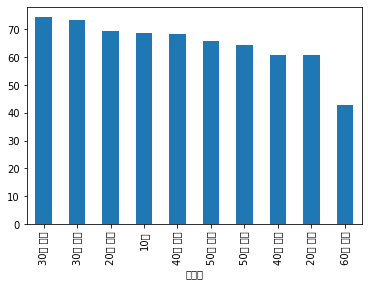

In [47]:
# 구매율을 시각화한다.
# 구매율은 60대 이상을 제외하면 모두 60% 이상이다. 
buy_rate.plot.bar()
plt.show()

주 고객 층인 20대 후반, 30대 초반, 30대 후반이 가장 구매율이 높다는 점이 눈에 띈다.

In [48]:
# 연령대별 구매 횟수를 구한다
age_gen_count = cus_df.groupby(['성별', '연령대'])['구매 횟수'].count()
age_gen_count

성별  연령대   
남자  20대 초반     17
    20대 후반     84
    30대 초반    120
    30대 후반     70
    40대 초반     40
    40대 후반     18
    50대 초반     16
    50대 후반     13
    60대 이상      2
여자  10대        16
    10대 미만      1
    20대 초반    108
    20대 후반    330
    30대 초반    339
    30대 후반    251
    40대 초반    153
    40대 후반     92
    50대 초반     54
    50대 후반     15
    60대 이상      5
Name: 구매 횟수, dtype: int64

In [49]:
# 연령대별로 구매 횟수가 0인 것들을 가져온다.
age_gen_0_count = cus_df[cus_df['구매 횟수'] == 0].groupby(['성별', '연령대'])['구매 횟수'].count()
age_gen_0_count

성별  연령대   
남자  20대 초반     8
    20대 후반    27
    30대 초반    31
    30대 후반    18
    40대 초반    21
    40대 후반     8
    50대 초반     6
    50대 후반     5
    60대 이상     2
여자  10대        5
    20대 초반    41
    20대 후반    99
    30대 초반    86
    30대 후반    67
    40대 초반    40
    40대 후반    35
    50대 초반    18
    50대 후반     5
    60대 이상     2
Name: 구매 횟수, dtype: int64

In [50]:
# 구매율을 구한다.
buy_gen_rate = (1 - age_gen_0_count / age_gen_count) * 100
buy_gen_rate = buy_gen_rate.sort_values(ascending=False)
buy_gen_rate = buy_gen_rate.dropna()

In [51]:
buy_gen_rate

성별  연령대   
여자  30대 초반    74.631268
남자  30대 후반    74.285714
    30대 초반    74.166667
여자  40대 초반    73.856209
    30대 후반    73.306773
    20대 후반    70.000000
    10대       68.750000
남자  20대 후반    67.857143
여자  50대 초반    66.666667
    50대 후반    66.666667
남자  50대 초반    62.500000
여자  20대 초반    62.037037
    40대 후반    61.956522
남자  50대 후반    61.538462
여자  60대 이상    60.000000
남자  40대 후반    55.555556
    20대 초반    52.941176
    40대 초반    47.500000
    60대 이상     0.000000
Name: 구매 횟수, dtype: float64

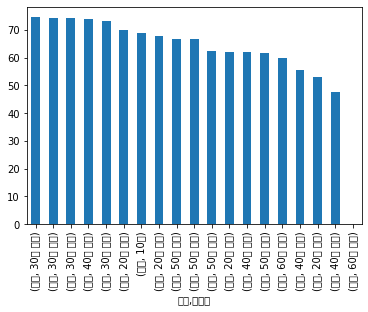

In [52]:
# 성별을 구분한 구매율을 시각화한다.
# 성별을 구분하지 않은 구매율과 조금은 다른 결과가 나오지만, 코어층의 구매율은 60 ~ 70%로 상위권에 속한다.
buy_gen_rate.plot.bar()
plt.show()

#### 문자 수신 동의 여부 별 구매율

In [53]:
# 문자 수신 동의 여부별 구매 횟수를 구한다
mak_count = cus_df.groupby(['마케팅 문자 수신 동의 여부', '마케팅 이메일 수신 동의 여부'])['구매 횟수'].count()
mak_0_count = cus_df[cus_df['구매 횟수'] == 0].groupby(['마케팅 문자 수신 동의 여부', '마케팅 이메일 수신 동의 여부'])['구매 횟수'].count()

# 구매율을 구한다.
buy_mak_rate = (1 - mak_0_count / mak_count) * 100
buy_mak_rate = buy_mak_rate.sort_values(ascending=False)
buy_mak_rate = buy_mak_rate.dropna()

In [54]:
buy_mak_rate

마케팅 문자 수신 동의 여부  마케팅 이메일 수신 동의 여부
동의               거부                  71.428571
                 동의                  71.396731
거부               동의                  66.666667
                 거부                  64.690027
Name: 구매 횟수, dtype: float64

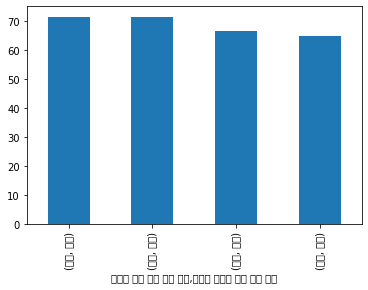

In [55]:
buy_mak_rate.plot.bar()
plt.show()

In [56]:
# 문자 수신 동의 여부별 구매 횟수를 구한다
mak_gen_count = cus_df.groupby(['성별', '마케팅 문자 수신 동의 여부'])['구매 횟수'].count()
mak_gen_0_count = cus_df[cus_df['구매 횟수'] == 0].groupby(['성별', '마케팅 문자 수신 동의 여부'])['구매 횟수'].count()

# 구매율을 구한다.
buy_mak_gen_rate = (1 - mak_gen_0_count / mak_gen_count) * 100
buy_mak_gen_rate = buy_mak_gen_rate.sort_values(ascending=False)
buy_mak_gen_rate = buy_mak_gen_rate.dropna()

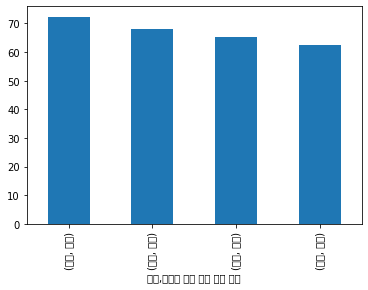

In [57]:
buy_mak_gen_rate.plot.bar()
plt.show()

성별 구분 없이 문자 수신 동의 했을 때 더욱 높은 구매율을 보였다.

# cus 데이터에서 사용자 검색을 한다면 ?
- 어떤 정보들을 뽑아야할까 ?
   - 포함되어야 할 기준 : 고객 이름별 - 생년월일, 성별, 지역, 구매횟수, 총 참가횟수(구매횟수-인증굿즈), 참가 프로그램 리스트, 프로그램 카테고리, 프로그램별 인증률, 3일 참가횟수, 7일 참가횟수, 30일 참가 횟수, 참가 기수

- 이름은 중복되므로, 이메일로 검색하는것이 더욱 좋지않을까 ...??

In [58]:
# 메일을 받아온다면
mail = 'albilleo@naver.com'

In [59]:
cus_df[cus_df['이메일'] == mail]

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년,나이,연령대
1741,-,-,albilleo@naver.com,배동민,010-5064-1833,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,10,492750,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,동의,동의,1986,36,30대 후반


#### ?? 명의 동료와 함께 하고 있어요 ! (연령대 기준)

In [60]:
# 연령대
age_count = cus_df.groupby('연령대')['구매 횟수'].count()

print(age_count[age_count.index == cus_df[cus_df['이메일'] == mail]['연령대'].values[0]].values[0], '명의 비슷한 나이의 동료와 함께 하고 있어요 !')

321 명의 비슷한 나이의 동료와 함께 하고 있어요 !


In [61]:
age_count[age_count.index == cus_df[cus_df['이메일'] == mail]['연령대'].values[0]].values[0]

321

In [62]:
order[order['이메일'] == mail]['상품 이름'].values

array(['한달 독서', '[ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일)', '한달 블로그 매일 쓰기',
       '한달 쓰기', '한달 글쓰기 유치원', '한달 쓰기', '한달자기발견 (VAT포함)', '한달커리어발견',
       '한달쓰기', '한달쓰기'], dtype=object)

In [63]:
order[order['이메일'] == mail]

,상품 이름,주문자 이름,휴대폰 번호,이메일,상품별 결제 금액,상품별 주문 상태,배송지 이름,배송지 휴대폰 번호,우편번호,배송지 주소,배송 시 요청 사항,주문 상태,주문 품목 개수,부분 취소 금액,부분 취소 후 잔액,상품 합계 금액,배송비,배송 메모,주문 일자,결제 방법,수량,메모,주문 제목,결제 금액,취소/반품 상품 수량,주문번호,상품 주문번호 (네이버페이),주문자 유형,주문자 아이디,택배회사,송장번호,개인통관고유부호,사용한 적립금,적립될 적립금,사용한 쿠폰,쿠폰 할인 금액,사용한 할인 코드,할인 코드 할인 금액,총 할인 금액,상품 부분 취소 전 상품 합계 금액,상품 부분 취소 전 배송비,상품 부분 취소 전 사용한 적립금,상품 부분 취소 전 적립될 적립금,상품 부분 취소 전 쿠폰 할인 금액,상품 부분 취소 전 할인 코드 할인 금액,상품 부분 취소 전 총 할인 금액,입금받을 계좌 정보,입금자,입금 기한,에스크로,TID,환불 계좌,취소/반품 사유,상품 코드,상품 옵션 정보,추가 옵션 정보,작성형 옵션 정보,주문 수량과 관계없이 고정된 추가 옵션 추가 금액
221,한달 독서,배동민,010-5064-1833,albilleo@naver.com,59400,승인,배동민,010-5064-1833,-,NaN,-,결제 완료,1,-,-,59400,0,-,2021-08-11 17:19:48,신용 / 체크카드,1,-,한달 독서,54400,0,20210811AJBGK,-,회원,-,기타,-,NaN,0,0,[ 국내 스타트업 경진대회 1위 기념 쿠폰 ],5000,-,0,5000,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120210811172142155591,-,-,30dr0001,-,-,-,-
861,[ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일),배동민,010-5064-1833,albilleo@naver.com,0,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,0,0,NaN,2021-06-22 14:26:21,-,1,-,[ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일),0,0,20210622K50YA,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
982,한달 블로그 매일 쓰기,배동민,010-5064-1833,albilleo@naver.com,59400,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,59400,0,NaN,2021-06-12 11:07:14,신용 / 체크카드,1,-,한달 블로그 매일 쓰기,54400,0,20210612UZDLT,-,회원,-,기타,-,NaN,0,0,[ 실천지원쿠폰 ],5000,-,0,5000,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120210612110914955151,-,-,30dw0004,-,-,-,-
1515,한달 쓰기,배동민,010-5064-1833,albilleo@naver.com,52800,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,52800,0,NaN,2021-04-24 22:19:51,신용 / 체크카드,1,-,한달 쓰기,52800,0,20210424UEBQA,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120210424222302555356,-,-,30dw0001,-,-,-,-
1877,한달 글쓰기 유치원,배동민,010-5064-1833,albilleo@naver.com,84150,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,84150,0,NaN,2021-03-04 17:08:10,신용 / 체크카드,1,-,한달 글쓰기 유치원,74150,0,202103045UTMI,-,회원,-,기타,-,NaN,0,0,-,0,12기 멤버 재구매용,10000,10000,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120210304170956245824,-,-,-,-,-,-,-
2448,한달 쓰기,배동민,010-5064-1833,albilleo@naver.com,33000,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,33000,0,NaN,2021-01-16 15:44:50,신용 / 체크카드,1,-,한달 쓰기,33000,0,20210116DUUMD,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120210116154716835094,-,-,-,-,-,-,-
2892,한달자기발견 (VAT포함),배동민,010-5064-1833,albilleo@naver.com,99000,승인,배동민,010-5064-1833,-,NaN,-,거래 완료,1,-,-,99000,0,NaN,2020-11-30 21:40:14,신용 / 체크카드,1,-,한달자기발견 (VAT포함),99000,0,20201130KQ47I,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120201130214304615945,-,-,-,-,-,-,-
3039,한달커리어발견,배동민,010-5064-1833,albilleo@naver.com,70000,승인,배동민,010-5064-1833,16687,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",-,거래 완료,1,-,-,70000,0,NaN,2020-10-20 07:11:25,신용 / 체크카드,1,-,한달커리어발견,65000,0,20201020SCZP7,-,회원,-,기타,-,NaN,5000,0,-,0,-,0,5000,-,-,-,-,-,-,-,-,-,-,-,INIMX_CARDSIXhandal120201020071310535347,-,-,-,-,-,-,-
3327,한달쓰기,배동민,010-5064-1833,albilleo@naver.com,30000,승인,배동민,010-5064-1833,16687,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",-,거래 완료,1,-,-,30000,0,NaN,2020-08-31 21:44:05,카카오페이,1,-,한달쓰기,30000,0,20200831LWIFW,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2801286999081875278,-,-,-,-,-,-,-
3415,한달쓰기,배동민,010-5064-1833,albilleo@naver.com,30000,승인,배동민,010-5064-1833,16687,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",-,거래 완료,1,-,-,30000,0,NaN,2020-07-22 22:16:18,카카오페이,1,-,한달쓰기,30000,0,20200722ACLEL,-,회원,-,기타,-,NaN,0,0,-,0,-,0,0,-,-,-,-,-,-,-,-,-,-,-,T2786451868508616870,-,-,-,참여 기간: 한달 쓰기 (30일),-,-,-


In [64]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   상품 이름                        3422 non-null   object 
 1   주문자 이름                       3422 non-null   object 
 2   휴대폰 번호                       3422 non-null   object 
 3   이메일                          3422 non-null   object 
 4   상품별 결제 금액                    3422 non-null   int64  
 5   상품별 주문 상태                    3422 non-null   object 
 6   배송지 이름                       3422 non-null   object 
 7   배송지 휴대폰 번호                   3422 non-null   object 
 8   우편번호                         3422 non-null   object 
 9   배송지 주소                       834 non-null    object 
 10  배송 시 요청 사항                   3422 non-null   object 
 11  주문 상태                        3422 non-null   object 
 12  주문 품목 개수                     3422 non-null   int64  
 13  부분 취소 금액          

# 상품 구매 내역 cus 데이터에 추가

In [65]:
# 구매 내역이 있는 고객들
order_cus = cus_df[cus_df['구매 횟수'] != 0]

In [66]:
# 구매 내역이 있는 고객들의 메일
order_cus_mail = order_cus['이메일'].values

In [67]:
item_dict = {}
for i in order_cus_mail :
  item_dict[i] = order[order['이메일'] == i]['상품 이름'].values


In [68]:
cus_df['상품 목록'] = '-'
for i in item_dict :
  cus_df['상품 목록'].loc[cus_df['이메일'] == i] = [item_dict[i]]

In [69]:
cus_df

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년,나이,연령대,상품 목록
0,kakao,사용,hiba486@naver.com,렬이,010-8942-9008,-,1980-12-01,남자,0,0,2021-09-27 13:26:57,2021-09-27 13:26:57,2021-09-27 13:26:57,-,동의,동의,1980,42,40대 초반,-
1,-,-,gooeykookie@gmail.com,고민지,010-9877-2380,-,1996-03-28,여자,1,0,2021-09-27 09:39:59,2021-09-27 09:39:59,2021-09-27 09:40:25,-,거부,거부,1996,26,20대 후반,"[[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~1..."
2,-,-,abygh12@naver.com,유근혜,010-2309-7883,-,1990-09-04,여자,0,0,2021-09-27 03:31:20,2021-09-27 03:31:20,2021-09-27 03:31:20,-,거부,거부,1990,32,30대 초반,-
3,kakao,사용,ssjin9@nate.com,성수진,010-4830-1463,-,1999-06-24,여자,0,0,2021-09-26 20:39:08,2021-09-26 20:39:08,2021-09-26 20:39:08,-,동의,동의,1999,23,20대 초반,-
4,kakao,사용,tjdud_1217@naver.com,이서영,010-4487-1217,-,1997-12-17,여자,2,0,2021-09-26 18:24:13,2021-09-26 19:42:32,2021-09-26 19:42:37,-,거부,거부,1997,25,20대 후반,"[[ 3일 독서 ] 아주 특별한 성공의 법칙 9/28(화)~9/30(목), [ 3일..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,-,-,lleunjoo@gmail.com,이은주,010-5297-3171,"서울 중랑구 신내역로 165 (신내동, 신내 데시앙포레) 215-1402",1980-10-13,여자,12,364500,2020-07-22 22:58:07,2021-04-28 10:31:08,2021-03-24 11:03:31,-,거부,거부,1980,42,40대 초반,"[구글 코리아 상무는 어떻게 일할까? 일하는 감각을 배우는 7일독서, 한달 자유 독..."
1740,-,-,cherish1240@naver.com,김미경,010-5175-1240,"대구 북구 검단로 115 (검단동, 유성청구아파트) 105동 1217호",1987-10-26,여자,3,130000,2020-07-22 22:39:00,2020-11-30 17:38:34,2020-10-18 23:27:35,-,거부,거부,1987,35,30대 후반,"[한달보물지도, [ 신규 오픈 할인 이벤트 ~9.6 ] 한달영어쓰기, 한달미디엄]"
1741,-,-,albilleo@naver.com,배동민,010-5064-1833,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,10,492750,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,동의,동의,1986,36,30대 후반,"[한달 독서, [ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일..."
1742,-,-,om55824@naver.com,오미영,010-9278-5824,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",1981-12-24,여자,2,114300,2020-07-22 21:42:43,2021-03-01 14:56:02,2021-01-16 18:57:57,-,동의,동의,1981,41,40대 초반,"[한달 굿즈 만들기, 한달서평]"


# 첫 상품 구매 내역 cus 데이터에 추가

In [70]:
# 이메일과 주문일자를 기준으로 order 데이터를 정렬하면 각 이메일별로 첫번째 관측치들이 첫 상품 구매 내역이 된다.
order_sort = order.sort_values(by = ['이메일', '주문 일자'])

In [71]:
order_sort_mail = order_sort['이메일'].value_counts().index

In [72]:
order_sort['이메일'].value_counts().index[0]

'mizzmk@naver.com'

In [73]:
order_sort[order_sort['이메일'] == order_sort['이메일'].values[0]]['상품 이름'].iloc[0]

'[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~10/7(목)'

In [74]:
first_item_dict = {}
for i in order_sort_mail :
  first_item_dict[i] = order_sort[order_sort['이메일'] == i]['상품 이름'].iloc[0]

In [75]:
cus_df['첫 구매 상품'] = '-'
for i in first_item_dict :
  cus_df['첫 구매 상품'].loc[cus_df['이메일'] == i] = first_item_dict[i]

In [76]:
cus_df

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년,나이,연령대,상품 목록,첫 구매 상품
0,kakao,사용,hiba486@naver.com,렬이,010-8942-9008,-,1980-12-01,남자,0,0,2021-09-27 13:26:57,2021-09-27 13:26:57,2021-09-27 13:26:57,-,동의,동의,1980,42,40대 초반,-,-
1,-,-,gooeykookie@gmail.com,고민지,010-9877-2380,-,1996-03-28,여자,1,0,2021-09-27 09:39:59,2021-09-27 09:39:59,2021-09-27 09:40:25,-,거부,거부,1996,26,20대 후반,"[[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~1...","[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~10..."
2,-,-,abygh12@naver.com,유근혜,010-2309-7883,-,1990-09-04,여자,0,0,2021-09-27 03:31:20,2021-09-27 03:31:20,2021-09-27 03:31:20,-,거부,거부,1990,32,30대 초반,-,-
3,kakao,사용,ssjin9@nate.com,성수진,010-4830-1463,-,1999-06-24,여자,0,0,2021-09-26 20:39:08,2021-09-26 20:39:08,2021-09-26 20:39:08,-,동의,동의,1999,23,20대 초반,-,-
4,kakao,사용,tjdud_1217@naver.com,이서영,010-4487-1217,-,1997-12-17,여자,2,0,2021-09-26 18:24:13,2021-09-26 19:42:32,2021-09-26 19:42:37,-,거부,거부,1997,25,20대 후반,"[[ 3일 독서 ] 아주 특별한 성공의 법칙 9/28(화)~9/30(목), [ 3일...","[ 3일 독서 ] 슛뚜 | 낯선 일상을 찾아, 틈만 나면 걸었다 10/5(화)~10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,-,-,lleunjoo@gmail.com,이은주,010-5297-3171,"서울 중랑구 신내역로 165 (신내동, 신내 데시앙포레) 215-1402",1980-10-13,여자,12,364500,2020-07-22 22:58:07,2021-04-28 10:31:08,2021-03-24 11:03:31,-,거부,거부,1980,42,40대 초반,"[구글 코리아 상무는 어떻게 일할까? 일하는 감각을 배우는 7일독서, 한달 자유 독...",한달서평
1740,-,-,cherish1240@naver.com,김미경,010-5175-1240,"대구 북구 검단로 115 (검단동, 유성청구아파트) 105동 1217호",1987-10-26,여자,3,130000,2020-07-22 22:39:00,2020-11-30 17:38:34,2020-10-18 23:27:35,-,거부,거부,1987,35,30대 후반,"[한달보물지도, [ 신규 오픈 할인 이벤트 ~9.6 ] 한달영어쓰기, 한달미디엄]",한달미디엄
1741,-,-,albilleo@naver.com,배동민,010-5064-1833,"경기 수원시 영통구 영통로 111 (망포동, 엘지동수원자이아파트) 304동705호",1986-01-29,남자,10,492750,2020-07-22 22:15:54,2021-09-01 07:58:42,2021-08-11 17:21:42,-,동의,동의,1986,36,30대 후반,"[한달 독서, [ 3일 독서 ] 사수가 없어도 괜찮습니다 6/25(금)~6/27(일...",한달쓰기
1742,-,-,om55824@naver.com,오미영,010-9278-5824,"인천 연수구 선학로 100 (선학동, 금호아파트) 3동 304호",1981-12-24,여자,2,114300,2020-07-22 21:42:43,2021-03-01 14:56:02,2021-01-16 18:57:57,-,동의,동의,1981,41,40대 초반,"[한달 굿즈 만들기, 한달서평]",한달서평


In [77]:
cus_df['첫 구매 상품'].value_counts()

-                                              396
한달 브런치 작가 되기                                   112
한달 쓰기                                           94
[ 3일 독서 ] 정지음 | 젊은 ADHD의 슬픔 8/19(목)~8/21(토)     66
한달 디자인 유치원                                      66
                                              ... 
한달어스 14기 금메달리스트 실물 굿즈 신청 (마감:6월13일 자정)           1
1일 1커밋                                           1
한달쓰기 (VAT포함)                                     1
한달 디자인                                           1
[ 7일 명상 ] 나를 위한 휴식 #Relaxweek                    1
Name: 첫 구매 상품, Length: 123, dtype: int64

In [78]:
cus_df[cus_df['이메일'] == 'dlgydls020@naver.com']

,소셜 로그인,카카오 계정 연동,이메일,이름,휴대폰 번호,주소,생년월일,성별,구매 횟수,구매 금액,가입일자,최근 로그인,최근 수정일,메모,마케팅 문자 수신 동의 여부,마케팅 이메일 수신 동의 여부,생년,나이,연령대,상품 목록,첫 구매 상품
634,kakao,사용,dlgydls020@naver.com,이소연,010-8784-5892,-,1995-05-21,여자,1,600000,2021-05-06 12:00:42,2021-05-06 12:00:42,2021-05-06 12:01:15,-,거부,거부,1995,27,20대 후반,[대관 결제 전용페이지],대관 결제 전용페이지


# 인증데이터

tbl_group 
- member_cnt : 그룹에 가입한 총 멤버 수 
- descript : 그룹 설명
- group type : 그룹별 색깔 구분위함

tbl_link
- idx : 데이터 순서
- group_idx : 그룹 인식 번호

tbl_member
- medal : 한 프로그램 종료 후 수료증 획득한 프로그램
- score : 동메달(80%이하 수료,30일 중 24일 이하)~금메달(100%수료, 30일 중 30일)에 따라 차등적으로 스코어가 매겨짐
- username : 가입할 때 타이핑으로 입력한 실명(그래도 실명 안넣는 경우 있음)
- usernick : 카카오톡에서 본인이 설정해둔 이름

In [79]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_group.csv', header = 0, error_bad_lines = False)

,idx,season,name,member_cnt,wait_cnt,descript,is_open,group_type,master_idx,startdate,bandal,regdate
0,1,1,한달쓰기 1기,26,0,한달쓰기 1기,Y,W,34.0,2019-09-07,N,2019-09-07 00:00:00
1,7,2,Test👏🏻👏🏻👏🏻,3,0,개발테스트용 그룹,Y,T,18.0,2019-12-01,N,2019-10-20 01:11:16
2,22,2,한달 매거진,14,0,당신의 테마는 무엇인가요?,Y,MG,27.0,2019-10-15,N,2019-10-21 00:12:40
3,24,2,한달머니,8,0,새로운 머니파이프라인을 설치해 봅시다.,Y,MN,22.0,2019-10-15,N,2019-10-21 00:35:44
4,28,2,Rocket🚀,12,0,"연결과 변화, 성장을 향해 날아가는 한달로켓입니다 :) 탑승할 준비 되셨나요?",Y,W,39.0,2019-10-15,N,2019-10-21 02:09:08
...,...,...,...,...,...,...,...,...,...,...,...,...
147,244,16,한달 러닝,15,0,자신만의 속도로 달리고 기록하기,Y,MN,175.0,2021-08-31,N,2021-08-27 11:51:22
148,246,16,한달 브런치 작가 되기,25,0,글 쓰기 연습하며 브런치 작가 심사 도전하기,Y,MC,175.0,2021-08-31,N,2021-08-27 11:53:03
149,247,16,한달 미라클 모닝 & 한 줄 감사일기,12,0,활기찬 아침을 시작하며 감사일기 쓰기,Y,MW,175.0,2021-08-31,N,2021-08-27 11:55:11
150,248,16,한달 브런치 글쓰기,18,0,한 달 동안 브런치에 글쓰기,Y,MS,175.0,2021-08-31,N,2021-08-27 11:56:23


In [80]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_group.csv', header = 0, error_bad_lines = False)['name'].value_counts()

한달머니        6
한달서평        5
한달자기발견      5
한달 독서       5
한달 쓰기       5
           ..
한달 브런치      1
한달 자존감      1
Fullmoon    1
한달드로잉       1
한달 매거진      1
Name: name, Length: 96, dtype: int64

In [81]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_group_member.csv', header = 0, error_bad_lines = False)

,idx,gidx,midx,link_cnt,glevel,countyn,reg_date
0,11,22,27,0,5,Y,2019-10-21 00:16:07
1,12,22,18,0,2,Y,2019-10-21 00:17:34
2,13,22,39,0,2,Y,2019-10-21 00:18:51
3,14,22,34,0,2,Y,2019-10-21 00:36:01
4,15,24,22,0,5,Y,2019-10-21 00:36:08
...,...,...,...,...,...,...,...
995,1146,142,182,0,2,Y,2020-10-30 19:08:35
996,1147,141,182,0,2,Y,2020-10-30 19:08:43
997,1148,142,261,0,2,Y,2020-10-30 19:09:40
998,1149,139,316,0,2,Y,2020-10-30 19:09:52


In [82]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_link.csv', header = 0, error_bad_lines = False)

b'Skipping line 196: expected 16 fields, saw 18\nSkipping line 210: expected 16 fields, saw 18\n'


,idx,season,group_idx,member_idx,link_url,link_title,link_desc,site_name,image_url,view_cnt,share_cnt,mycnt,todaycnt,is_del,memos,regdate
0,1,1,1,12.0,https://m.blog.naver.com/PostView.nhn?blogId=s...,php코드 속도 최적화 팁,호감가는 블로그 | 호감형 http://blog.naver.com/thehogam/...,naver,1569476223136,17,1,0.0,0.0,N,NaN,2019-09-26 14:37:03
1,2,1,1,12.0,https://m.blog.naver.com/PostView.nhn?blogId=s...,php코드 속도 최적화 팁,호감가는 블로그 | 호감형 http://blog.naver.com/thehogam/...,naver,1569476778478,0,1,0.0,0.0,N,NaN,2019-09-26 14:46:18
2,3,1,1,12.0,https://openai.com/blog/emergent-tool-use/,NaN,NaN,naver,NaN,2,1,0.0,0.0,N,NaN,2019-09-26 16:46:16
3,4,1,1,12.0,http://blog.hwang.gg/20190505/,서비스 회사가 SI 보다 좋은 점,1. 자발적으로 돌아가는 조직\n2. ₩\n3. 뛰어난 동료\n4. 개발자가 일하기...,naver,1569484014243,0,1,0.0,0.0,N,NaN,2019-09-26 16:46:54
4,5,1,1,12.0,https://m.blog.naver.com/southpaw0/221660096424,유럽 여행은 처음이라,10월 18일부터 28일까지 가족과 함께 유럽으로 여행을 간다.​스케줄은 이탈리아 ...,naver,1569484364750,3,1,0.0,0.0,N,NaN,2019-09-26 16:52:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1133,1,22,26.0,https://www.facebook.com/100002506779701/posts...,Yeon Han,나에게 성공이란 뭘까 오랫동안 고민해왔다.\n\n돈이 많은 걸까? 돈이 많아도 콧줄...,facebook,1573564045743,0,0,29.0,3.0,N,NaN,2019-11-12 22:07:26
1042,1134,1,22,26.0,https://www.facebook.com/100002506779701/posts...,Yeon Han,나에게 성공이란 뭘까 오랫동안 고민해왔다.\n\n돈이 많은 걸까? 돈이 많아도 콧줄...,facebook,1573564047806,7,1,29.0,3.0,N,NaN,2019-11-12 22:07:27
1043,1135,1,29,92.0,https://m.blog.naver.com/thdms8080/221705850219,#한달쓰기_20191112,#한달쓰기#영어일기​206.How often do you go to the thea...,naver,1573564196729,6,1,25.0,2.0,N,NaN,2019-11-12 22:09:56
1044,1136,1,29,60.0,https://www.instagram.com/p/B4xD5XrHqoq/?utm_s...,@ki_un_chan_drawing on Instagram: “⠀ 우연한 기회로 영...,"0 Likes, 0 Comments - @ki_un_chan_drawing on I...",instagram,1573564384106,5,1,29.0,3.0,N,NaN,2019-11-12 22:13:05


In [83]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_member.csv', header = 0, error_bad_lines = False) #['useremail'].dropna().reset_index(drop = True)

b'Skipping line 77: expected 26 fields, saw 27\nSkipping line 207: expected 26 fields, saw 27\n'


,idx,userid,username,username_fix,userlv,useremail,userphoto,userthumb,usernick,userjob,userintro,logindate,logincnt,logintype,pushid,kakaoid,userip,regist_time,refferurl,langtype_base,access_token,medal,score,sns,telno,checkname
0,18,56c607ae,cc,NaN,2,natsgun@zixo.co.kr,/photo/1630050687548,/photo/t1630050687548,차완진,개발자,안녕하세요 마법사 차차입니다,2021-08-27 16:56:23,611,K,NaN,1.171040e+09,117.111.1.95,2019-09-26 23:16:45,NaN,NaN,8lXs7OvjP9uF8MS9YWu26WltMOPPFvz2GqlAvwo9dVoAAA...,2||S1 한달쓰기 1기 /,2.0,NaN,ccc,N
1,22,08d040a9,최우진,NaN,2,xcastle@naver.com,/photo/1573655874568,/photo/t1573655874568,한달 리더 최우진,한달리더 / 회사원 / 블로거,현실적인 N잡러를 꿈꾸며 안정적인 부수입원을 개발하기 위해 매일을 기록합니다. 생각...,2021-08-28 11:38:28,230,K,NaN,1.177518e+09,223.38.24.236,2019-09-26 23:45:18,NaN,ko-kr,AcnxidSxLcGIlHsLQDYWBRt93DNBStBFG-zSOgopcFAAAA...,2||S1 한달쓰기 1기 / L||S2 한달머니 / 2||S2 한달머니 / 2||S...,76.0,NaN,01089338460,I
2,23,8be7c04d,효엠,NaN,2,aqua7019@naver.com,/photo/1575264027771,/photo/t1575264027771,한달 리더 김효선,화장품 회사 전략가,내가 사랑하는 브랜드를 어떻게 잘 운영해야하는지 로드맵을 그리고 가이드를 주는 일을...,2020-04-14 23:58:10,173,K,NaN,1.177519e+09,175.223.38.119,2019-09-26 23:46:12,NaN,ko-kr,je1501rOJEPoWsHjzt7eCECYv0LVjGfNp0KUNwopcFEAAA...,2||S1 한달쓰기 1기 / 3||S2 한달 매거진 / 2||S2 유니콘🦄 / L|...,37.0,NaN,NaN,N
3,24,dc85d7ac,Daemin,NaN,2,kdm032@gmail.com,http://th-p.talk.kakao.co.kr/th/talkp/wlk39myY...,http://th-p.talk.kakao.co.kr/th/talkp/wlk39myY...,Daemin,NaN,NaN,2019-11-26 17:10:49,54,K,NaN,1.177519e+09,39.7.28.75,2019-09-26 23:46:16,NaN,NaN,BaktxBxXP-WiaoMAuyNMLvD6nYIAQ9FMyYxO7AopdXcAAA...,1||S1 한달쓰기 1기 / 2||S2 한달 매거진 / 1||S2 Fullmoon /,8.0,NaN,NaN,N
4,25,1310d38c,오지수,NaN,2,madat_you@naver.com,/photo/15775429441,/photo/t15775429441,한달 1기 오지수,삶을 디자인하는 기획자,"상업환경 브랜딩과 공간을 디자인해왔으며, 최근에는 더나은 삶을 위한 좋은 공간, 예...",2021-08-26 21:06:52,24,K,NaN,1.177519e+09,39.123.69.200,2019-09-26 23:46:35,NaN,ko-kr,-Z1LnlQG2P7AvuoLg_VtFxXDg6itjqjzZ1bD8wo9c5sAAA...,2||S1 한달쓰기 1기 / 1||S2 Fullmoon /,5.0,NaN,01087677802,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1036,060532a1,송승연,NaN,2,NaN,https://p.kakaocdn.net/th/talkp/wmodtIJQoq/IQ9...,https://p.kakaocdn.net/th/talkp/wmodtIJQoq/IQ9...,송승연,NaN,귀염매력센스쟁이,2021-08-04 21:50:59,37,K,NaN,1.788503e+09,175.223.49.232,2021-06-30 18:14:24,NaN,NaN,MHEYN3oXQUVeXopcshPTgSTziP2AXW6t8t7z-wo9dVwAAA...,NaN,0.0,NaN,01079414305,N
995,1037,564a2186,전소영,NaN,2,6335540@hanmail.net,https://p.kakaocdn.net/th/talkp/wmmgc3f9fV/7Sf...,https://p.kakaocdn.net/th/talkp/wmmgc3f9fV/7Sf...,전소영,NaN,NaN,2021-08-04 23:25:23,31,K,NaN,1.788503e+09,223.38.84.130,2021-06-30 18:14:26,NaN,ko-kr,bEXZCFCVdd5HiRNO1rTXDOwrCVUvs18bhhAewAo9dGgAAA...,NaN,0.0,NaN,01047895540,N
996,1038,544327dc,김소진,NaN,2,thwlsdl63@naver.com,https://p.kakaocdn.net/th/talkp/wmklfHkGj4/XZd...,https://p.kakaocdn.net/th/talkp/wmklfHkGj4/XZd...,김소진,NaN,NaN,2021-09-26 23:42:14,67,K,NaN,1.788503e+09,112.220.51.142,2021-06-30 18:14:39,NaN,ko-kr,9YGZRIhRLFUCWzXfCTODm_Nh3FnxykQQEx9wtAo9c04AAA...,NaN,0.0,NaN,01041096555,I
997,1039,fe97522f,길수진,NaN,2,NaN,https://p.kakaocdn.net/th/talkp/wlIR1TbtMJ/YdH...,https://p.kakaocdn.net/th/talkp/wlIR1TbtMJ/YdH...,길수진,NaN,NaN,2021-09-26 21:34:18,55,K,NaN,1.781397e+09,106.101.67.66,2021-06-30 18:14:51,NaN,NaN,bBZgRBqIS9mkzRVIUCbzPLxCheCzasnKwAcLDwo9dRoAAA...,NaN,0.0,NaN,01080808602,I


# 인증데이터_sub

In [84]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_sub_group.csv', header = 0, error_bad_lines = False)

,idx,season,name,member_cnt,wait_cnt,descript,is_open,group_type,master_idx,color_text,color_bg,startdate,enddate,regdate
0,1,1,테스트 그룹,5,1,테스트 그룹입니다.,Y,NaN,1,#775555,#b5b9c9,2021-06-17,2021-06-23,2021-06-16 22:37:32
1,3,1,7일독서 <월급독립스쿨>,30,0,허대리와 함께하는 <월급독립스쿨>,Y,NaN,3,#eeeeee,#4c5d98,2021-06-18,2021-06-24,2021-06-17 20:55:02
2,9,1,[ 3일독서 1팀 ] 사수가 없어도 괜찮습니다,25,0,"함께 읽고, 매일 쓰고, 저자와 만나요!",Y,NaN,4,#ffffff,#2f51ca,2021-06-25,2021-06-27,2021-06-24 11:03:53
3,10,1,[ 3일독서 2팀 ] 사수가 없어도 괜찮습니다,19,0,"함께 읽고, 매일 쓰고, 저자와 만나요!",Y,NaN,4,#ffffff,#561fbd,2021-06-25,2021-06-27,2021-06-24 11:04:45
4,11,1,[ 3일독서 3팀 ] 사수가 없어도 괜찮습니다,24,0,"함께 읽고, 매일 쓰고, 저자와 만나요!",Y,NaN,4,#ffffff,#059988,2021-06-25,2021-06-27,2021-06-24 11:06:46
5,12,1,7일 노션 포트폴리오,42,0,노션으로 나만의 홈페이지 만들기,Y,NaN,4,#eeeeee,#38c274,2021-07-06,2021-07-12,2021-06-30 16:51:43
6,13,1,7일 감사일기 7/12~7/18,20,0,따뜻한 차와 함께하는 풍요로운 일주일,Y,NaN,4,#eeeeee,#a48904,2021-07-12,2021-07-18,2021-07-08 17:30:49
7,14,1,7일 목표지도 7/12~7/18,4,0,"실패하지 않는 목표 설정, 꿈을 현실로 만드는 일주일",Y,NaN,4,#eeeeee,#6a3ad9,2021-07-12,2021-07-18,2021-07-08 17:31:50
8,15,1,[ 3일독서 ] 돈의 흐름 with 전인구,40,2,"함께 읽고, 매일 쓰고, 저자와 만나요!",Y,NaN,4,#eeeeee,#244727,2021-07-20,2021-07-22,2021-07-19 10:25:36
9,18,1,[ 3일독서 1팀 ] 이진선 | 사수가 없어도 괜찮습니다,24,0,"함께 읽고, 매일 쓰고, 저자와 만나요!",Y,NaN,4,#ffffff,#12b587,2021-08-07,2021-08-09,2021-08-06 10:47:19


In [85]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_sub_group_member.csv', header = 0, error_bad_lines = False)

,idx,gidx,midx,link_cnt,glevel,countyn,reg_date
0,1,1,1,0,5,Y,2021-06-17 00:09:20
1,3,1,3,0,2,Y,2021-06-17 20:50:52
2,4,1,4,0,2,Y,2021-06-17 20:54:47
3,5,3,3,0,5,N,2021-06-17 20:55:14
4,6,3,4,0,2,N,2021-06-17 20:55:58
...,...,...,...,...,...,...,...
527,539,33,364,0,2,Y,2021-09-26 19:15:10
528,540,33,365,0,2,Y,2021-09-26 22:36:38
529,541,33,366,0,2,Y,2021-09-26 23:51:31
530,542,33,367,0,2,Y,2021-09-27 00:01:27


In [86]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_sub_link.csv', header = 0, error_bad_lines = False)

b'Skipping line 18: expected 16 fields, saw 17\nSkipping line 57: expected 16 fields, saw 18\nSkipping line 58: expected 16 fields, saw 18\nSkipping line 258: expected 16 fields, saw 18\nSkipping line 259: expected 16 fields, saw 18\n'


,idx,season,group_idx,member_idx,link_url,link_title,link_desc,site_name,image_url,view_cnt,share_cnt,mycnt,todaycnt,is_del,memos,regdate
0,4,1,1,1,https://natsgun.tistory.com/44,두렵다면 최악의 상황을 상상해보라.,앞이 보이지 않는 깜깜한 어둠이 두려운 이유는 앞에 뭐가 나올지 전혀 예상할 수가 ...,tistory,1.623930e+12,0,1,1,1,N,NaN,2021-06-17 20:36:07
1,5,1,1,4,https://www.facebook.com/100001119260552/posts...,이진선,드디어 저의 첫 책이 나왔습니다. 😆<사수 없이 일하며 성장하는 법>으로 2020년...,facebook,1.623931e+12,0,1,1,2,N,NaN,2021-06-17 20:57:21
2,6,1,1,1,https://m.blog.naver.com/rex816/222391810422,한달어스 30일차 - Bk letter,🎁 BK letter 안녕하세요. Bk 입니다. 어느덧 30일차 입니다. 수고 많았...,naver,1.623931e+12,0,0,1,2,N,NaN,2021-06-17 20:57:58
3,7,1,1,3,https://m.blog.naver.com/rex816/222391810422,한달어스 30일차 - Bk letter,🎁 BK letter 안녕하세요. Bk 입니다. 어느덧 30일차 입니다. 수고 많았...,naver,1.623931e+12,0,0,1,3,N,NaN,2021-06-17 20:58:32
4,8,1,1,1,https://m.blog.naver.com/rex816/222391810422,한달어스 30일차 - Bk letter,🎁 BK letter 안녕하세요. Bk 입니다. 어느덧 30일차 입니다. 수고 많았...,naver,1.623931e+12,0,0,1,2,N,NaN,2021-06-17 21:03:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1009,1,18,194,https://www.instagram.com/p/CSW3kUvJsWs/?utm_m...,\nLogin • Instagram\n,Welcome back to Instagram. Sign in to check ou...,instagram,NaN,2,1,3,10,N,NaN,2021-08-09 23:40:14
991,1010,1,18,183,https://blog.naver.com/dkcyber4/222463520261,사수가 없어도 괜찮습니다 3일차_ 구독자가 늘지 않는 이유,기록한날: 2021-8-9 [오늘의 문장] 많은 사람과 지속적으로 생각을 나누고 공...,naver,1.628520e+12,4,1,3,11,N,NaN,2021-08-09 23:40:38
992,1011,1,18,186,https://www.instagram.com/p/CSW31gipF4Y/?utm_m...,\nLogin • Instagram\n,Welcome back to Instagram. Sign in to check ou...,instagram,NaN,3,1,3,12,N,NaN,2021-08-09 23:43:37
993,1012,1,18,190,https://lyva.tistory.com/1549,DAY 3. 이미 내가 가진 무형 자산 인지하기,"오늘은 간단하게, 각장을 읽으면서 Key 문장들을 정리해보려고 한다. 1장. 사수는...",tistory,1.628520e+12,3,1,3,9,N,NaN,2021-08-09 23:44:31


In [87]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handal/handal_sub_member.csv', header = 0, error_bad_lines = False)

,idx,userid,username,username_fix,userlv,useremail,userphoto,userthumb,usernick,userjob,userintro,logindate,logincnt,logintype,pushid,kakaoid,userip,regist_time,refferurl,langtype_base,access_token,medal,score,sns,telno,checkname
0,1,785bb2dc,차완진0,NaN,5,natsgun@kakao.com,https://p.kakaocdn.net/th/talkp/wkbS8RoNhJ/61h...,https://p.kakaocdn.net/th/talkp/wkbS8RoNhJ/61h...,차완진a,NaN,NaN,2021-06-29 20:38:29,17,K,NaN,_1171039879,210.222.5.249,2021-06-16 19:33:20,NaN,NaN,pnQPINUkOY0WHWa7w6GdCi6IcwSXYnL-lkORPgopcNEAAA...,NaN,0,NaN,01047808654,I
1,3,b540c3ca,김준형 Bk,NaN,5,188cm.kim@kakao.com,https://p.kakaocdn.net/th/talkp/wlHCG3DskA/ygq...,https://p.kakaocdn.net/th/talkp/wlHCG3DskA/ygq...,김준형 Bk,NaN,NaN,2021-08-11 19:35:25,11,K,NaN,1172651535,223.62.219.141,2021-06-17 20:47:56,NaN,NaN,7K0eH_fBc-c6Z01ZtiSSeKBH-LHrTDK-tn2TQwo9cpcAAA...,NaN,0,NaN,01048412173,I
2,4,386b05b6,이진선,NaN,5,NaN,https://p.kakaocdn.net/th/talkp/wlgY6f09mn/b8c...,https://p.kakaocdn.net/th/talkp/wlgY6f09mn/b8c...,이진선,한달어스 코파운더,보이지 않는 가치를 디자인합니다. 결심을 실천으로 전환하는 커뮤니티 [ 한달어스 ]...,2021-09-27 11:11:28,57,K,NaN,1177519033,39.7.230.4,2021-06-17 20:54:21,NaN,ko-kr,VtTyiyL7jh9kZVroNxVRNdQfM1t9wVLVB5igJwo9cxcAAA...,NaN,0,NaN,01093356035,I
3,7,8b2052b1,배정웅,NaN,2,eugeneo@naver.com,https://p.kakaocdn.net/th/talkp/wmodBzF9tD/TRI...,https://p.kakaocdn.net/th/talkp/wmodBzF9tD/TRI...,배정웅,NaN,NaN,2021-06-23 12:34:27,6,K,NaN,1664821130,223.38.18.237,2021-06-18 06:43:42,NaN,NaN,l5QT5KPigWu0EjogmacGWlenfp5i0TgMqjnHGgopcSEAAA...,NaN,0,NaN,01055164049,I
4,8,94d46077,김나연,NaN,1,bluejin1111@gmail.com,https://p.kakaocdn.net/th/talkp/wk1aFFjfYi/mgv...,https://p.kakaocdn.net/th/talkp/wk1aFFjfYi/mgv...,김나연,NaN,NaN,2021-06-24 20:51:54,3,K,NaN,1632353539,221.155.184.76,2021-06-18 06:51:07,NaN,NaN,6ErxFLXl9dkhI8x5D314bCDbq0PtvJdAaF5qMAo9dVwAAA...,NaN,0,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,364,359db24c,김새암,NaN,2,kimsaeam@naver.com,https://p.kakaocdn.net/th/talkp/wmADTVPjgS/y7j...,https://p.kakaocdn.net/th/talkp/wmADTVPjgS/y7j...,김새암,NaN,NaN,2021-09-26 19:14:58,0,K,NaN,1562395203,223.62.11.224,2021-09-26 19:14:58,NaN,NaN,2hvJGY-Fhk6CsMereDs0gEmWT9g-1L_kHXs2sAo9cpcAAA...,NaN,0,NaN,01074422490,I
358,365,65bfe3c4,박한솔,NaN,2,alkelda@nate.com,https://p.kakaocdn.net/th/talkp/wlDxnmNVjX/oxU...,https://p.kakaocdn.net/th/talkp/wlDxnmNVjX/oxU...,박한솔,NaN,NaN,2021-09-26 22:36:28,0,K,NaN,1872949956,1.243.123.113,2021-09-26 22:36:28,NaN,NaN,rVTuqCaO3OYmdkPVy_PWeACt5xQfYHeo6ogD1Qo9c-wAAA...,NaN,0,NaN,01094336651,I
359,366,4c9921e8,송언지,NaN,2,NaN,https://p.kakaocdn.net/th/talkp/wmzeUvnyfZ/Ime...,https://p.kakaocdn.net/th/talkp/wmzeUvnyfZ/Ime...,송언지,NaN,NaN,2021-09-26 23:51:16,0,K,NaN,1926177019,59.24.110.117,2021-09-26 23:51:16,NaN,NaN,3DaaujhtiD_7nG4jgd4Fc13SQStL4Pwi2Ue0uAo9dVsAAA...,NaN,0,NaN,01032234485,I
360,367,fddab49e,박나미,NaN,2,NaN,https://p.kakaocdn.net/th/talkp/wlTYwg3PZt/V8m...,https://p.kakaocdn.net/th/talkp/wlTYwg3PZt/V8m...,Nami Bella Park,NaN,NaN,2021-09-27 00:00:56,0,K,NaN,1926186272,211.214.195.126,2021-09-27 00:00:56,NaN,ko-kr,2oTIvVw4YldfomBEoOBcIKTVeMg944jpUZ-x1worDNMAAA...,NaN,0,NaN,01093763338,I
